<a href="https://colab.research.google.com/github/NguyenThienPhat/NguyenThienPhat-24_02_2023/blob/main/nhan_dien_10_mon_an_vn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.optimizers import SGD, RMSprop
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils, to_categorical, load_img, img_to_array
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU

from sklearn import preprocessing
from sklearn.utils import validation
from sklearn.model_selection import train_test_split

In [ ]:
%cd /content/drive/MyDrive/bai3

/content/drive/MyDrive/bai3


In [ ]:
Data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
Train = Data.flow_from_directory('/content/drive/MyDrive/bai3', target_size=(150,150),batch_size=32, class_mode='categorical')
Train.class_indices

Found 200 images belonging to 10 classes.


{'banhbeo': 0,
 'banhcuon': 1,
 'banhtrangnuong': 2,
 'banhxeo': 3,
 'bun': 4,
 'che': 5,
 'comtam': 6,
 'garan': 7,
 'thitkho': 8,
 'tomnuong': 9}

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))

model.summary()
     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train=model.fit(Train, epochs=50, batch_size=256, verbose=1)

Epoch 1/50
7/7 [==============================] - 3s 216ms/step - loss: 0.0285 - accuracy: 0.9900
Epoch 2/50
7/7 [==============================] - 2s 240ms/step - loss: 0.0710 - accuracy: 0.9550
Epoch 3/50
7/7 [==============================] - 2s 275ms/step - loss: 0.0675 - accuracy: 0.9600
Epoch 4/50
7/7 [==============================] - 2s 366ms/step - loss: 0.1031 - accuracy: 0.9600
Epoch 5/50
7/7 [==============================] - 2s 350ms/step - loss: 0.0773 - accuracy: 0.9800
Epoch 6/50
7/7 [==============================] - 2s 386ms/step - loss: 0.0656 - accuracy: 0.9850
Epoch 7/50
7/7 [==============================] - 3s 409ms/step - loss: 0.0556 - accuracy: 0.9900
Epoch 8/50
7/7 [==============================] - 3s 500ms/step - loss: 0.0331 - accuracy: 0.9900
Epoch 9/50
7/7 [==============================] - 2s 217ms/step - loss: 0.0220 - accuracy: 0.9950
Epoch 10/50
7/7 [==============================] - 2s 220ms/step - loss: 0.0365 - accuracy: 0.9900
Epoch 11/50
7/7 [==

In [ ]:
Score=model.evaluate(Train,verbose=0)
print('Hàm Mất Mát Trên Tập Kiểm Tra : ', Score[0])
print('Độ Chính Xác Trên Tập Kiểm Tra : ', Score[1])

Hàm Mất Mát Trên Tập Kiểm Tra :  0.0023228274658322334
Độ Chính Xác Trên Tập Kiểm Tra :  1.0


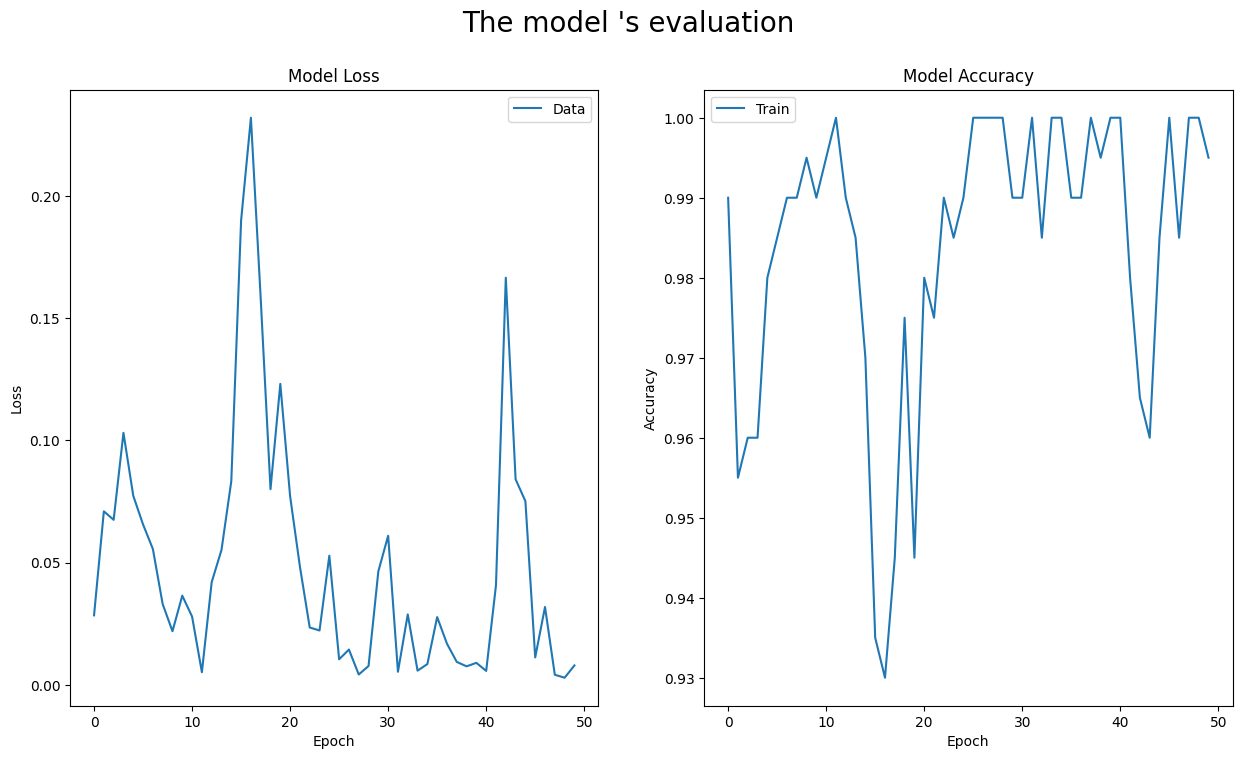

In [ ]:
fig,axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("The model 's evaluation ",fontsize=20)

axes[0].plot(train.history['loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Data'])

axes[1].plot(train.history['accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train'])
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Saved_Train/bai3.h5')

In [ ]:
model_1 = load_model('/content/drive/MyDrive/Saved_Train/bai3.h5')

1/1 [==============================] - 0s 382ms/step
Đây là  : bun


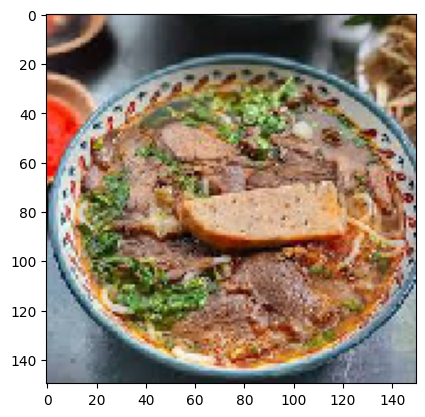

1/1 [==============================] - 0s 29ms/step
Đây là  : banhxeo


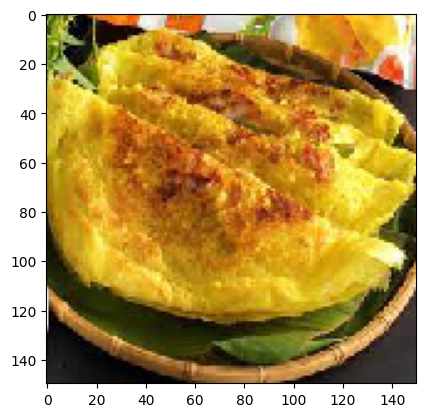

1/1 [==============================] - 0s 35ms/step
Đây là  : banhbeo


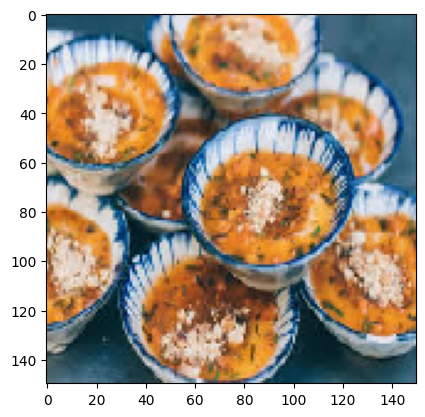

1/1 [==============================] - 0s 32ms/step
Đây là  : banhtrangnuong


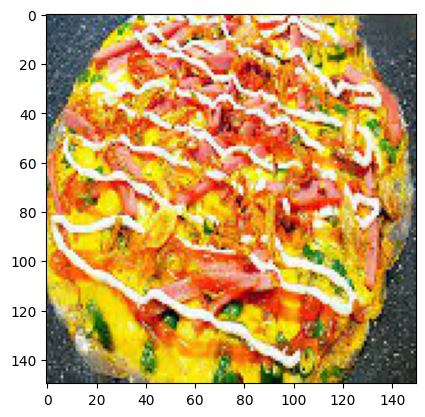

1/1 [==============================] - 0s 30ms/step
Đây là  : banhcuon


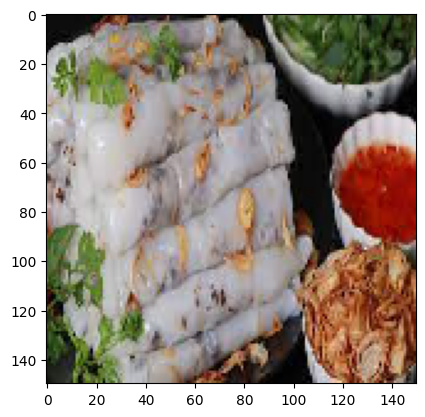

1/1 [==============================] - 0s 20ms/step
Đây là  : che


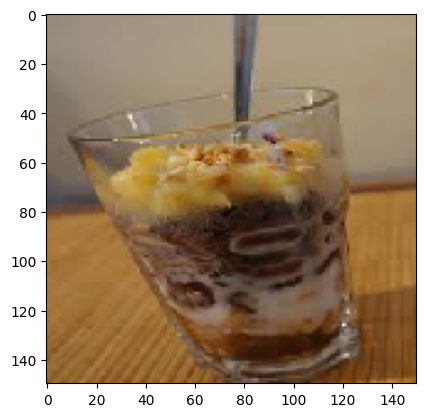

1/1 [==============================] - 0s 20ms/step
Đây là  : comtam


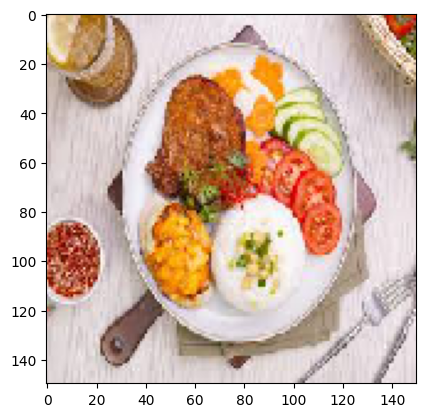

1/1 [==============================] - 0s 27ms/step
Đây là  : tomnuong


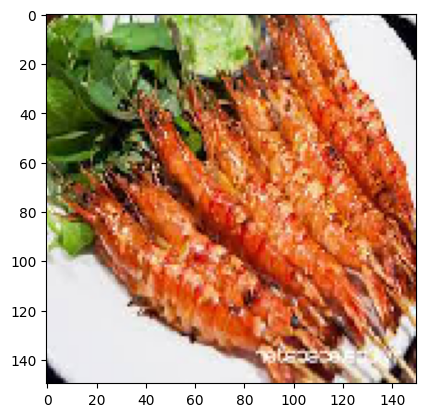

1/1 [==============================] - 0s 22ms/step
Đây là  : garan


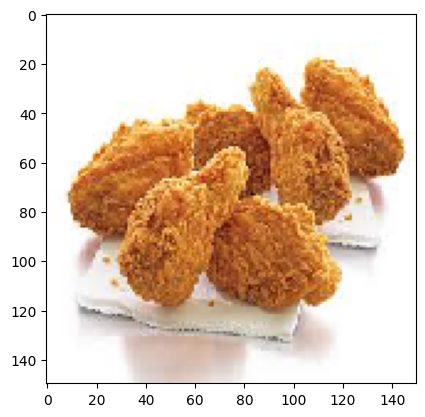

1/1 [==============================] - 0s 23ms/step
Đây là  : thitkho


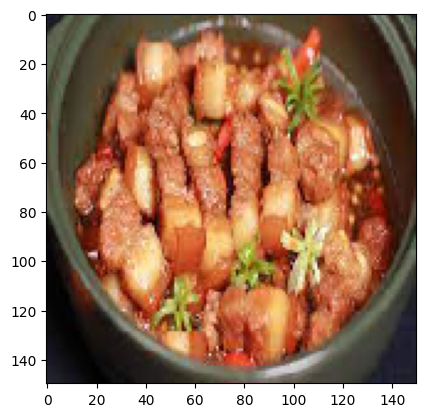

In [ ]:
folder='/content/drive/MyDrive/test3/'
for i in os.listdir(folder):
  img=load_img(folder+i, target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['banhbeo', 'banhcuon', 'banhtrangnuong', 'banhxeo', 'bun', 'che', 'comtam', 'garan', 'thitkho', 'tomnuong']
  print('Đây là  : {}'.format(class_name[result]))
  plt.show()